#                Credit-card-approval-prediction-classification

## Business problem

### Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming 
### We here automated this process by applying machine learning techniques .

### Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and understanding the data

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("train.csv")
data.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [5]:
data.shape

(29165, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [5]:
data=data.drop(["ID"],axis=1)

##### Calculate descriptive statistics about the Credit-card-approval-prediction-classification. 
#### These statistics will be extremely important later on to analyze various prediction results from the constructed model

In [6]:
data.describe()

,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [7]:
data.describe(include=object)

,Gender,Has a car,Has a property,Employment status,Education level,Marital status,Dwelling,Job title
count,29165,29165,29165,29165,29165,29165,29165,20138
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,19549,18128,19557,15056,19803,20044,26059,5004


## Handling missing values


In [8]:
data.isnull().sum()

Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [9]:
train_data=data.copy(deep=True)

In [10]:
nan_value = float("NaN")

train_data.replace("", nan_value, inplace=True)

train_data.dropna(subset = ["Job title"], inplace=True)


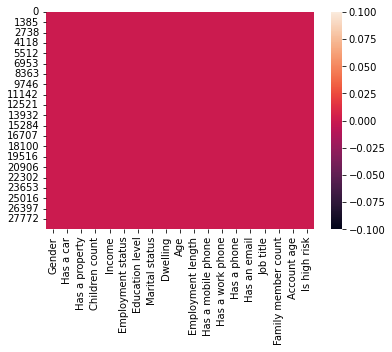

In [11]:
sns.heatmap(train_data.isnull())
plt.show()

## checking correlation

In [12]:
cov=train_data.corr()
cov

,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
Children count,1.000000,-0.012425,0.255431,0.066852,NaN,-0.008605,-0.018960,-0.016096,0.901826,-0.001901,0.000742
Income,-0.012425,1.000000,-0.056889,-0.018223,NaN,-0.090085,0.012918,0.080193,-0.021607,-0.024665,0.006800
Age,0.255431,-0.056889,1.000000,0.342152,NaN,0.037858,-0.029300,0.061263,0.210786,0.090832,0.011393
Employment length,0.066852,-0.018223,0.342152,1.000000,NaN,-0.011293,-0.043548,0.043181,0.049961,0.089152,0.037865
Has a mobile phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has a work phone,-0.008605,-0.090085,0.037858,-0.011293,NaN,1.000000,0.369800,-0.067268,0.009921,-0.013454,0.003855
Has a phone,-0.018960,0.012918,-0.029300,-0.043548,NaN,0.369800,1.000000,0.008308,-0.005142,-0.016999,0.001576
Has an email,-0.016096,0.080193,0.061263,0.043181,NaN,-0.067268,0.008308,1.000000,-0.009022,0.005975,0.001442
Family member count,0.901826,-0.021607,0.210786,0.049961,NaN,0.009921,-0.005142,-0.009022,1.000000,-0.023075,-0.005906
Account age,-0.001901,-0.024665,0.090832,0.089152,NaN,-0.013454,-0.016999,0.005975,-0.023075,1.000000,-0.062472


#### correlation analysis with heatmap, after dropping the has a mobile phone with the target feature as int
#### There is no feature that is correlated with the target feature
#### Family member count is highly correlated with children count as previously discussed

In [13]:
train_data=train_data.drop(["Has a mobile phone"],axis=1)

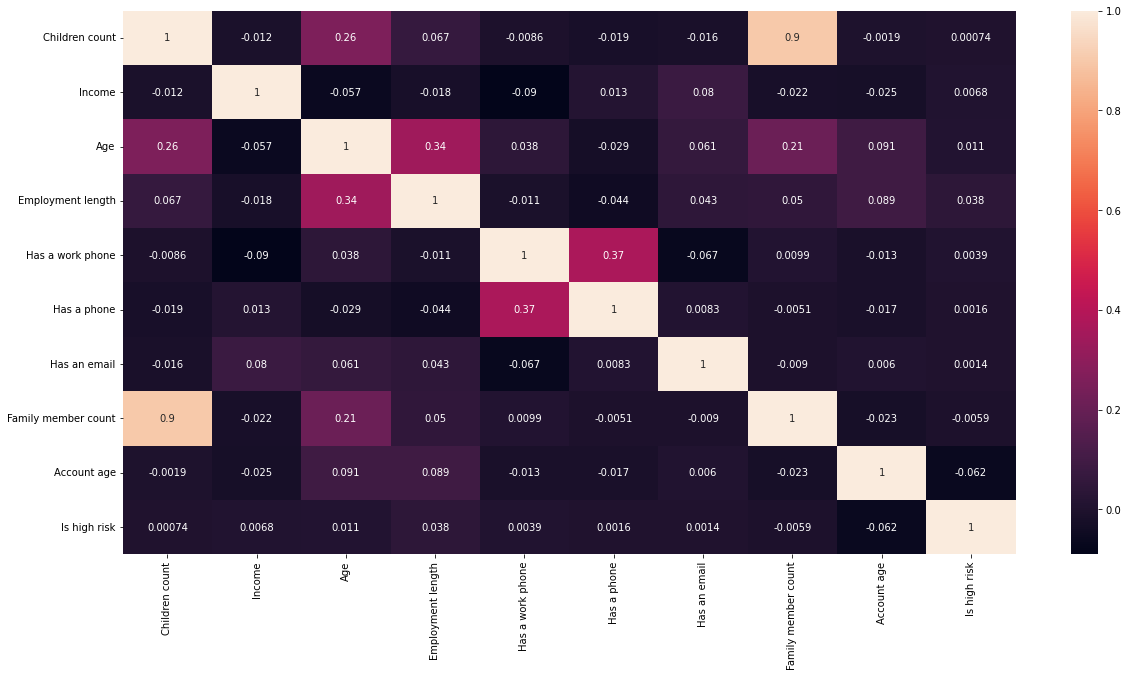

In [14]:

plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True,fmt='.2g')
plt.show()

## Outliers treatment


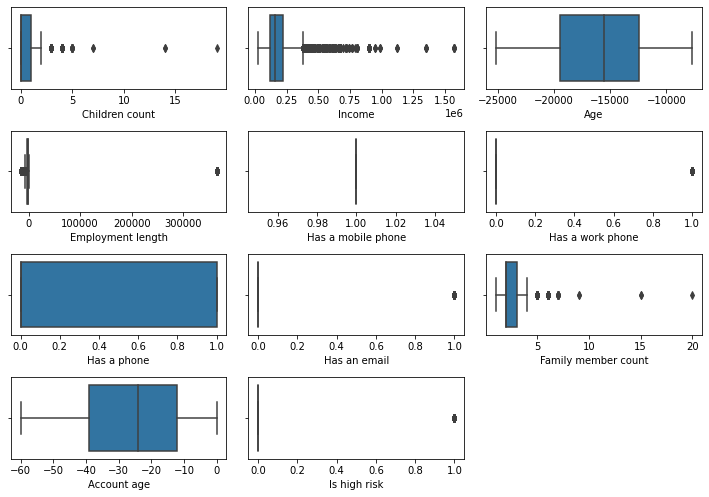

In [15]:
object_ = train_data.select_dtypes(include=["object"]).columns
count = 1
plt.figure(figsize=(10,10))
for i in data.columns:
    if i not in object_:
        plt.subplot(6,3,count)
        sns.boxplot(data[i])
        count = count+1
plt.tight_layout()

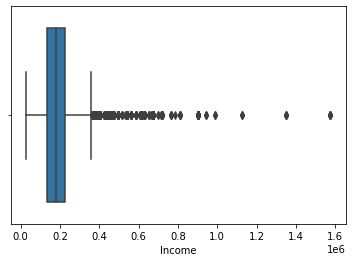

In [16]:
sns.boxplot(train_data['Income']) 
plt.show()

In [17]:
Q1=train_data.quantile(0.25)

Q3=train_data.quantile(0.75)

IQR=Q3-Q1

condition = ~((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR))).any(axis=1)


## Data Visualization 

#### train data dataframe contains highly imbalaned data

0    19794
1      344
Name: Is high risk, dtype: int64


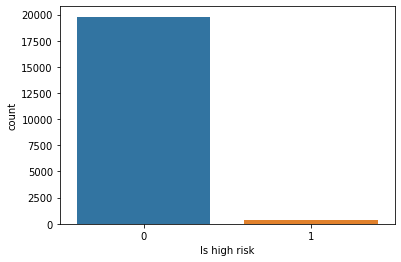

In [18]:
n=train_data["Is high risk"].value_counts()
print(n)
sns.countplot(train_data["Is high risk"])
plt.show()


#### histogram is helps to under stand the dataspred

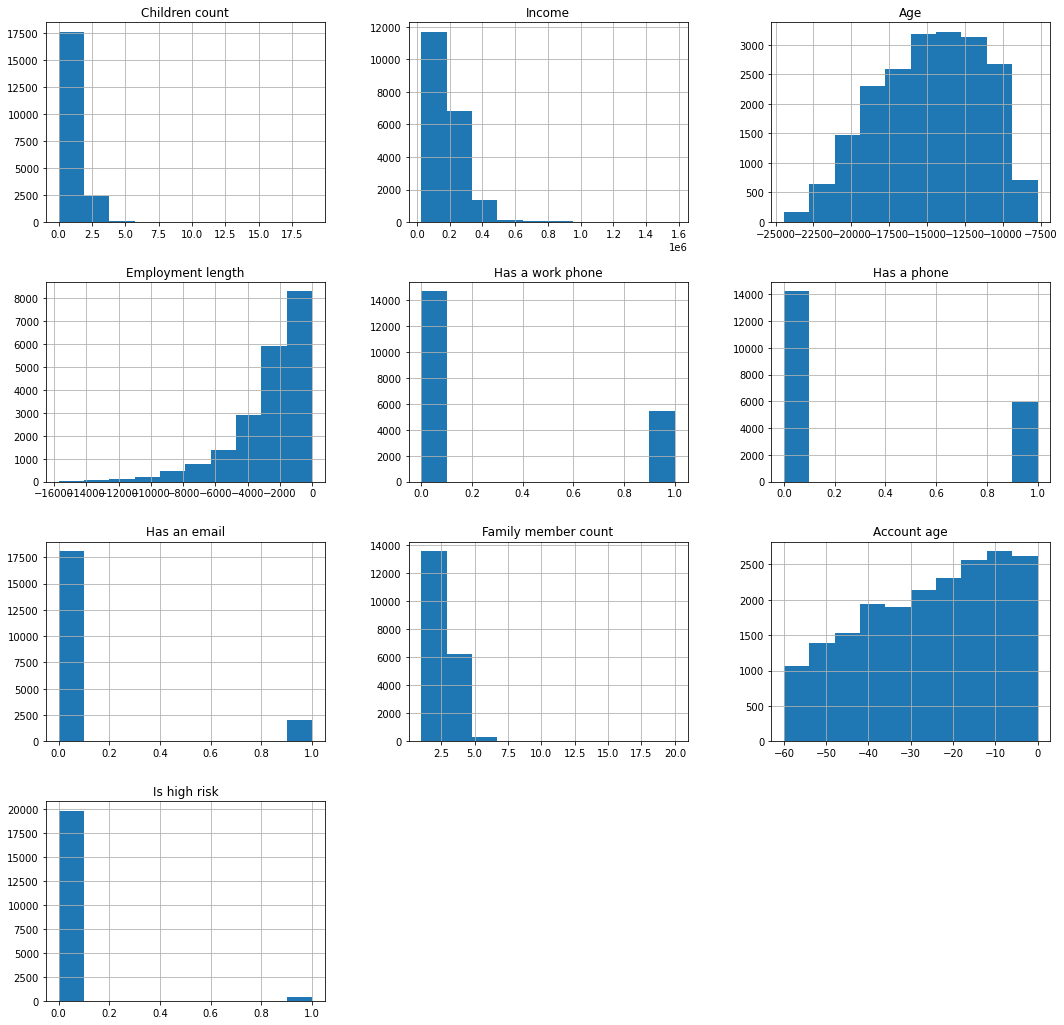

In [19]:
train_data.hist(figsize=[18,18])
plt.show()

#### Another interesting trend is the Employment length and age. This also makes sense, the longer the employee has been working, the older they are

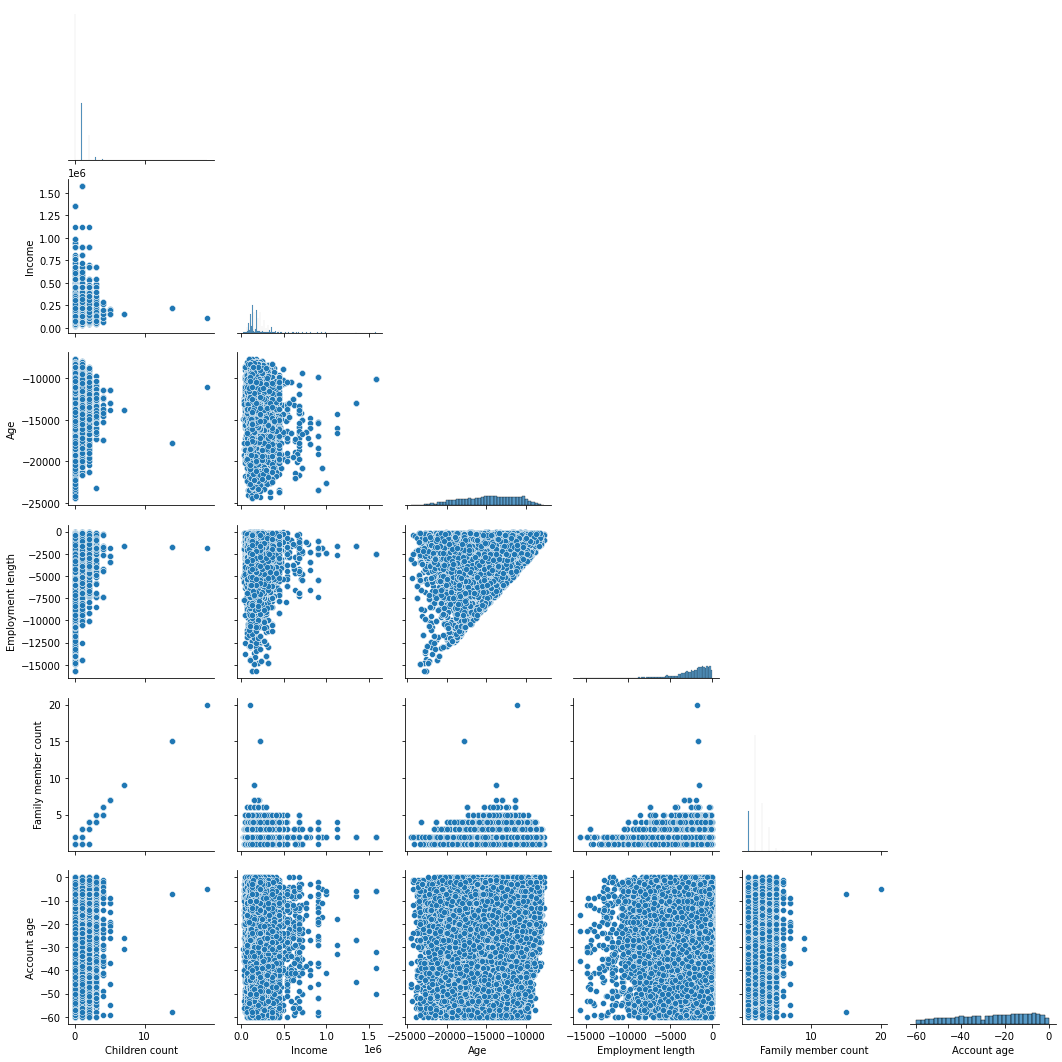

In [20]:
sns.pairplot(train_data.drop(['Has a work phone', 'Has a phone', 'Has an email','Is high risk'],axis=1),corner=True)
plt.show()

<Figure size 1080x1080 with 0 Axes>

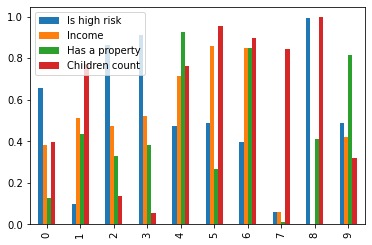

In [22]:
plt.figure(figsize=(15,15))
data1 =  pd.DataFrame(np.random.rand(10, 4),columns=["Is high risk", "Income", "Has a property", "Children count"])

data1.plot.bar()
plt.show()

### most of applicants are female

F    12522
M     7616
Name: Gender, dtype: int64


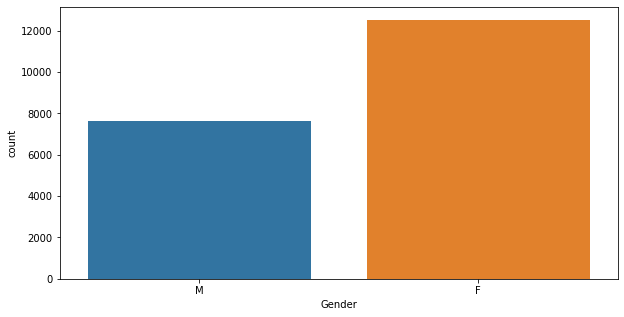

In [23]:
print(train_data['Gender'].value_counts())
plt.figure(figsize=[10,5])
sns.countplot(train_data['Gender'])
plt.show()

#### Most applicant don’t have own a car

N    11762
Y     8376
Name: Has a car, dtype: int64


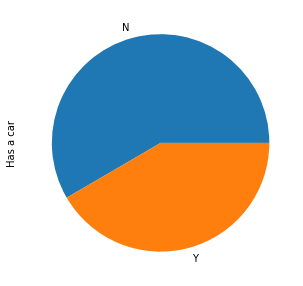

In [24]:
print(train_data["Has a car"].value_counts())
train_data["Has a car"].value_counts().plot(kind='pie',figsize=(5,5))
plt.show()

#### Income is not normally distributed, it is positively skewed

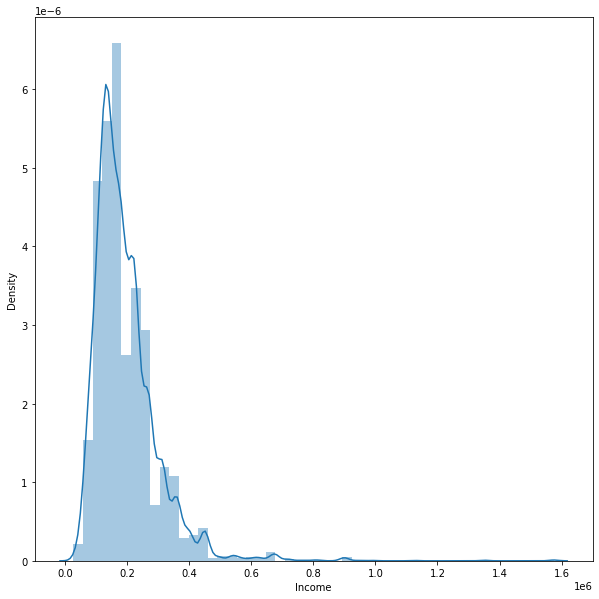

In [25]:
plt.figure(figsize=[10,10])
sns.distplot(train_data['Income'])
plt.show()

#### The more children a person has, the larger the family member count.

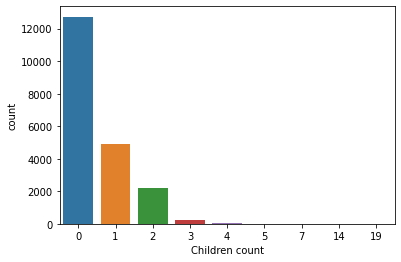

In [26]:
sns.countplot(train_data["Children count"])
plt.show()

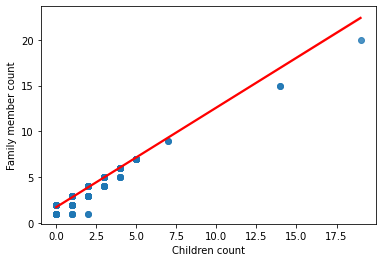

In [27]:
sns.regplot(x='Children count',y='Family member count',data=train_data,line_kws={'color': 'red'})
plt.show()

#### most of applicatns are having 2 childerns

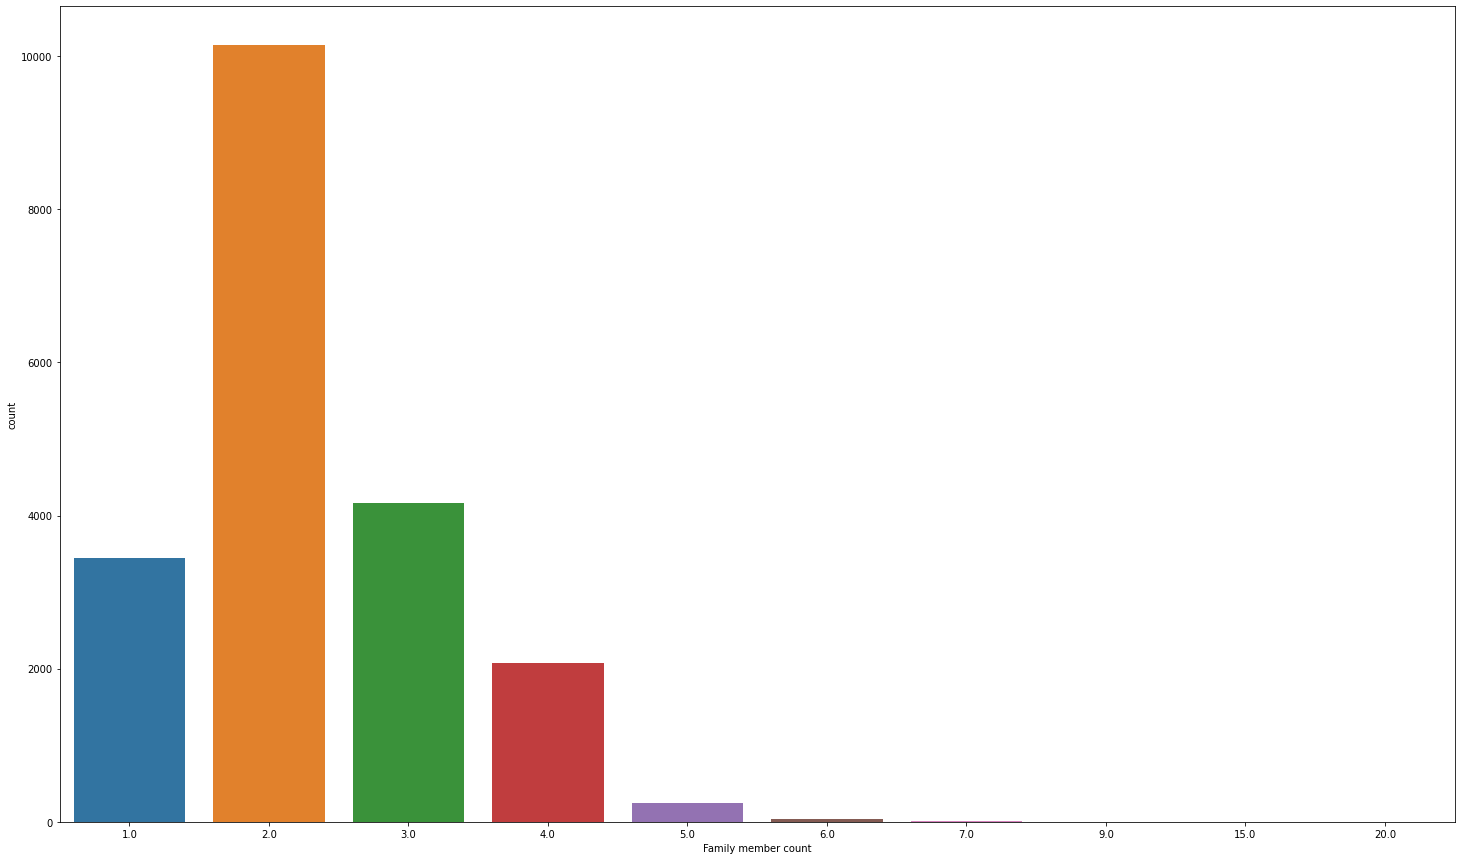

In [28]:
plt.figure(figsize=(25,15))
sns.countplot(train_data['Family member count'])
plt.show()

#### This scatterplot shows that the age of the applicants is correlated with the length of the employment.

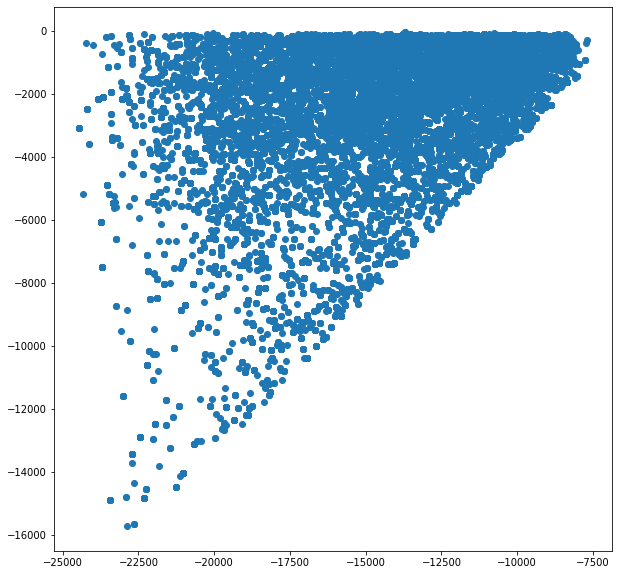

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(train_data['Age'],train_data['Employment length'])
plt.show()

#### This scatterplot shows that the income of the applicants is correlated with the account age.

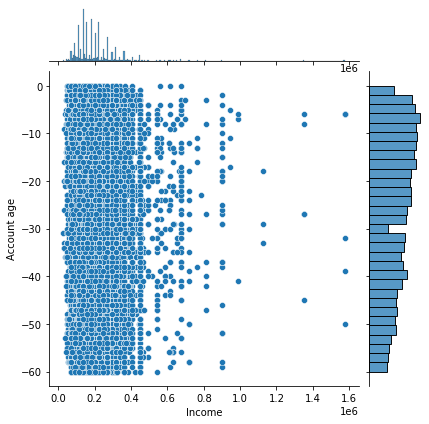

In [30]:
sns.jointplot(x=train_data["Income"], y=train_data['Account age'], kind='scatter')
plt.show()

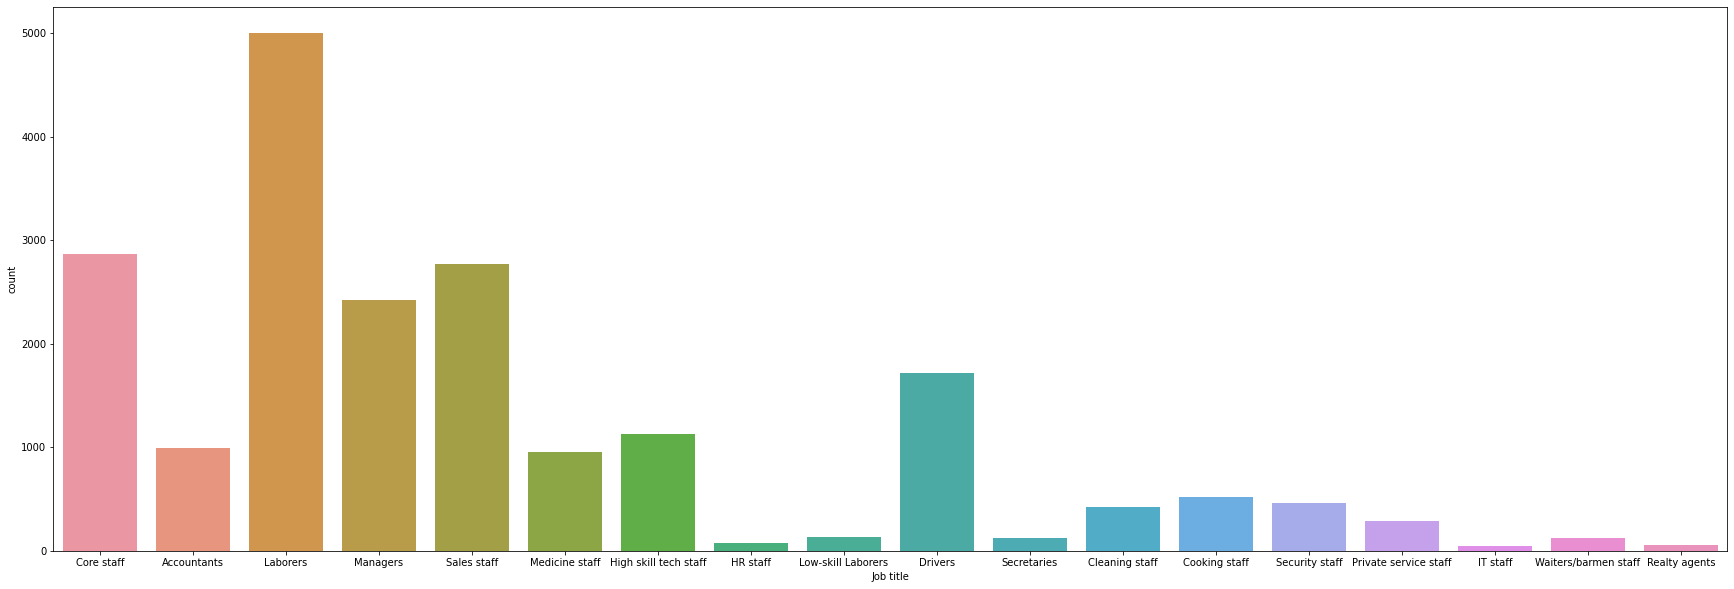

In [31]:
## most of applicats are :
plt.figure(figsize=(30,10))
sns.countplot(train_data["Job title"])
plt.show()

#### Most applicants are married

Married                 14026
Single / not married     2776
Civil marriage           1668
Separated                1201
Widow                     467
Name: Marital status, dtype: int64


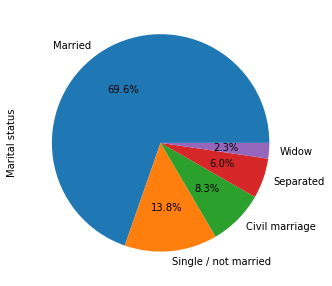

In [32]:

print(train_data['Marital status'].value_counts())
train_data['Marital status'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.show()

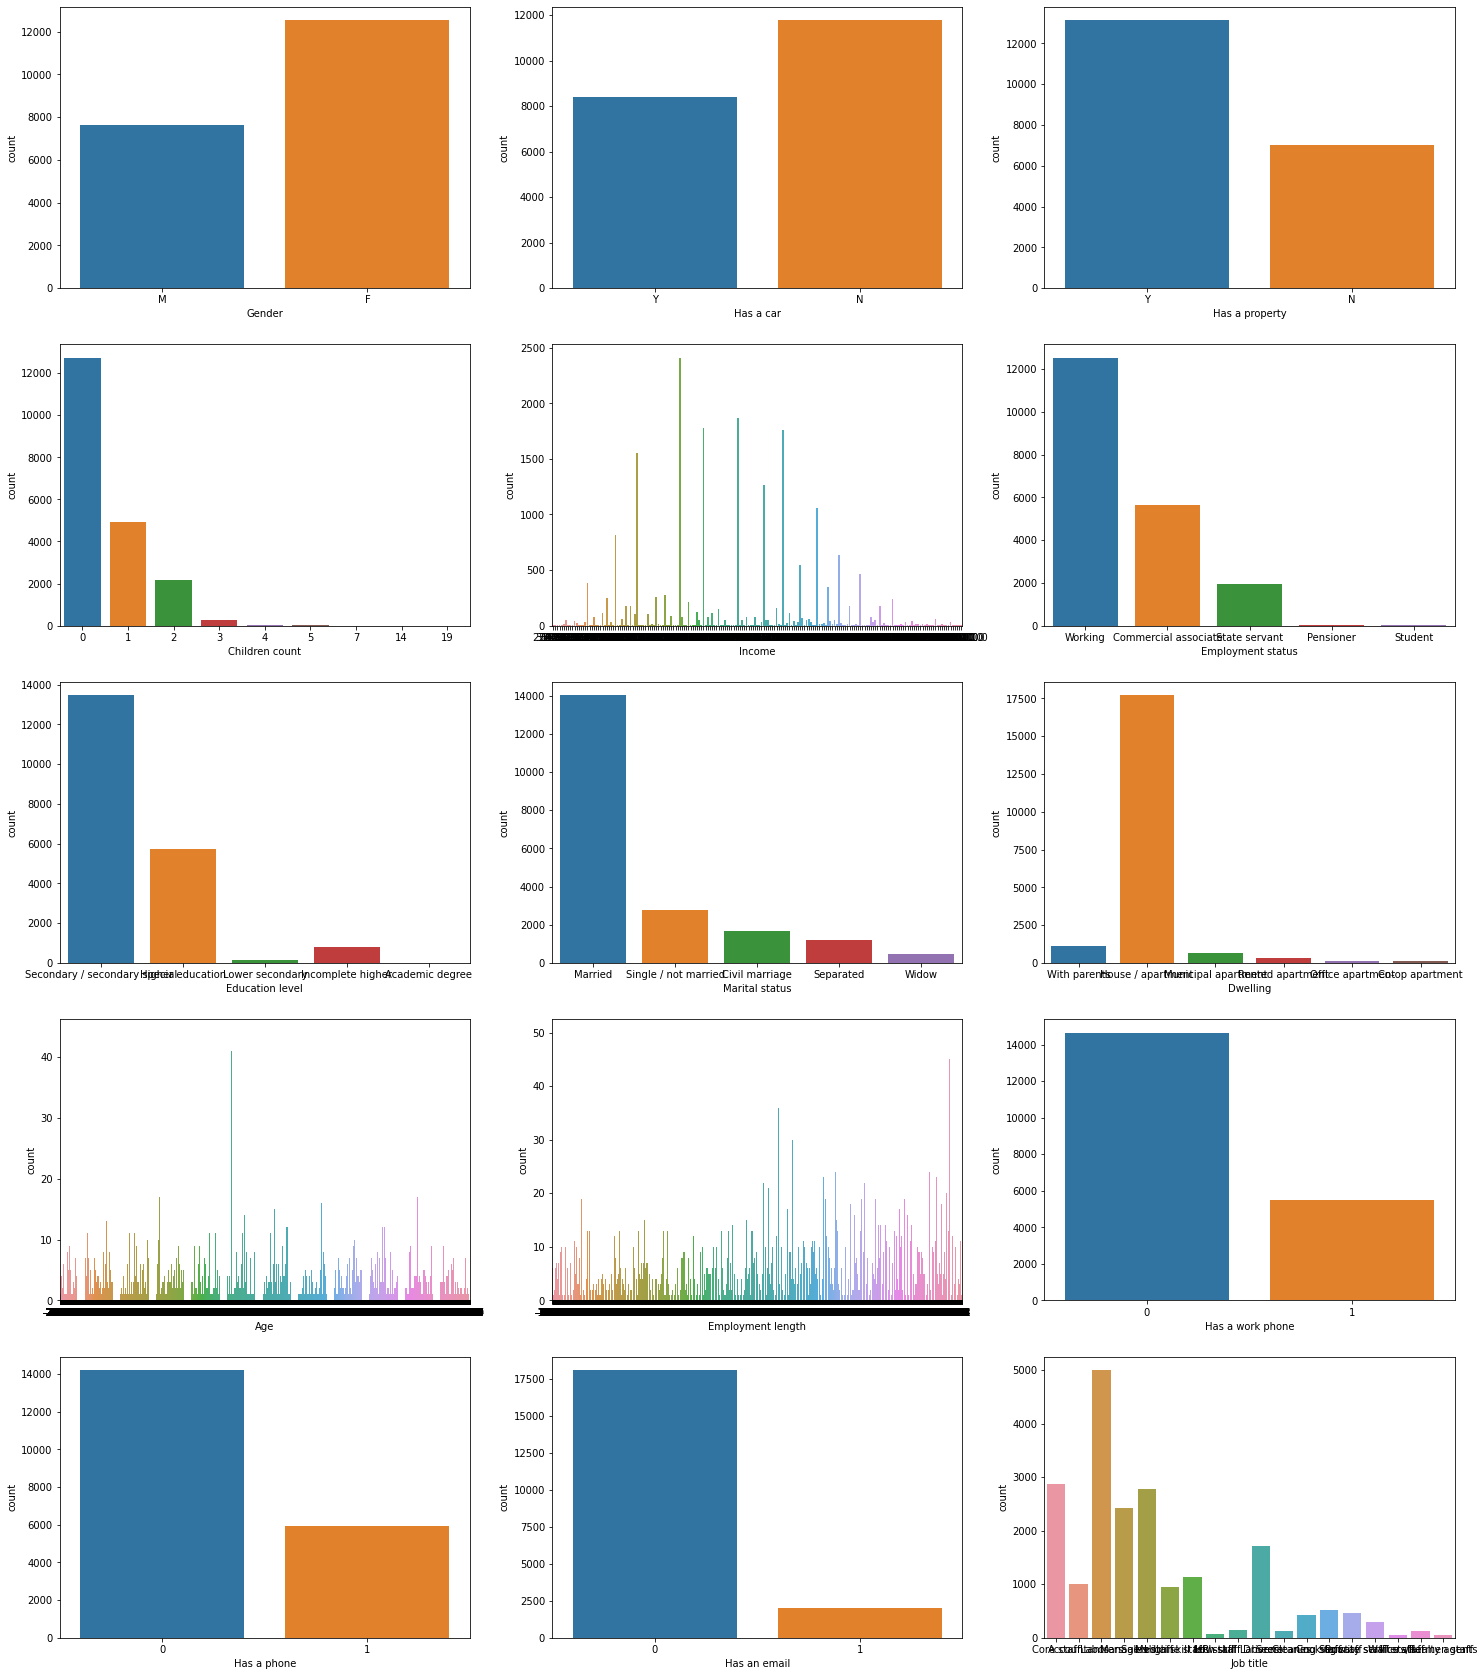

In [33]:
from pandas.api.types import is_string_dtype
categorical=[]
for column in train_data:
        categorical.append(column)
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(25, 30))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(train_data[variable], ax = subplot)
plt.show()

In [34]:
train_data.columns

Index(['Gender', 'Has a car', 'Has a property', 'Children count', 'Income',
       'Employment status', 'Education level', 'Marital status', 'Dwelling',
       'Age', 'Employment length', 'Has a work phone', 'Has a phone',
       'Has an email', 'Job title', 'Family member count', 'Account age',
       'Is high risk'],
      dtype='object')

#### The majority of applicants have completed their secondary degree, ¼ completed their higher education

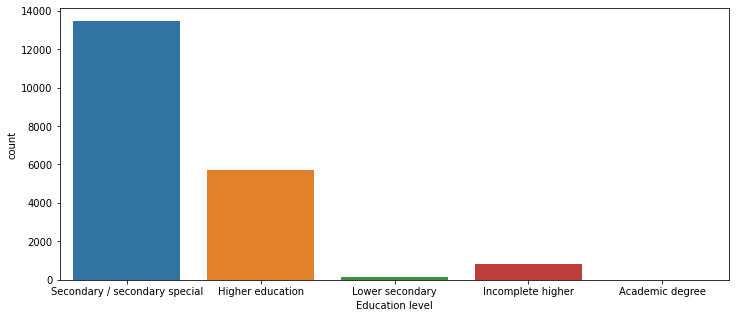

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(train_data["Education level"])
plt.show()


#### From the bar chart, it is clear that Most of the clients own a house or living in a apartment 

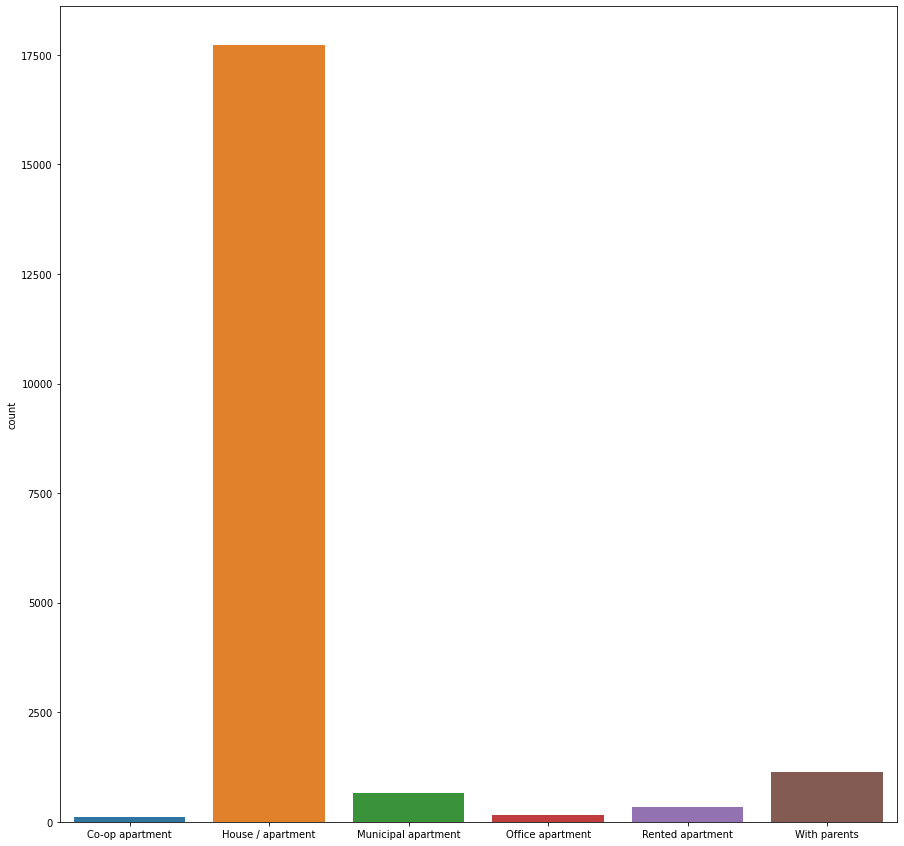

In [36]:
plt.figure(figsize=[15,15])
sns.countplot(sorted(train_data['Dwelling']))
plt.show()

#### Most accounts are 26 months old
#### Account age is not normally distributed, it is positively skewed

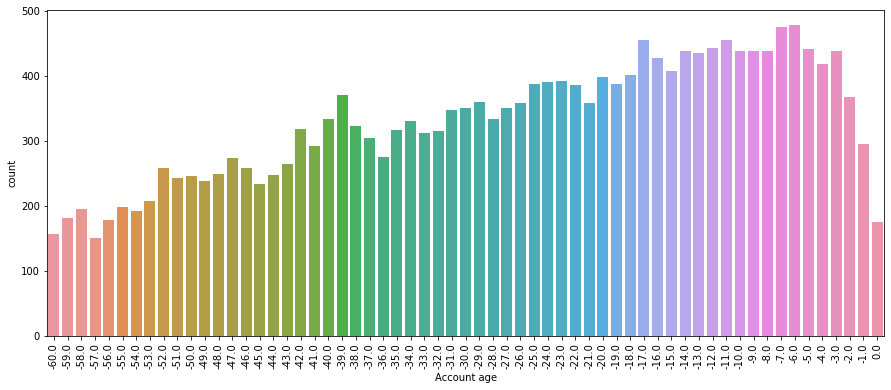

In [37]:
plt.figure(figsize=[15,6])
plt.xticks(rotation='vertical')
sns.countplot(train_data['Account age'])
plt.show()

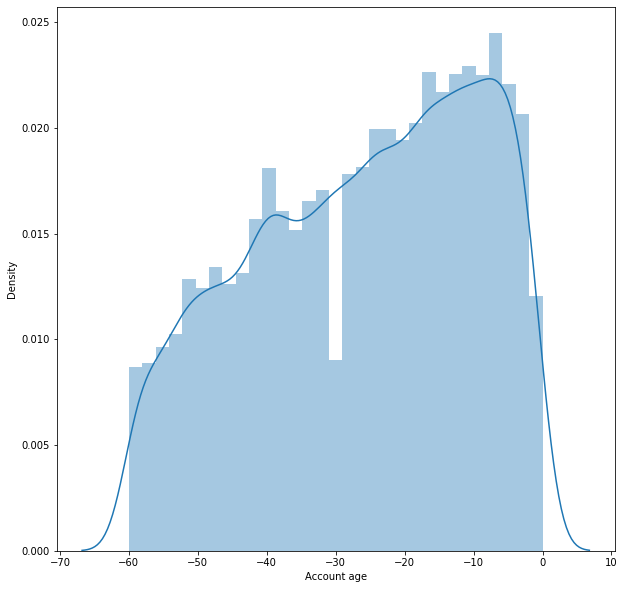

In [38]:
plt.figure(figsize=[10,10])
sns.distplot(train_data['Account age'])
plt.show()

#### most of applicants are working

Working                 12531
Commercial associate     5642
State servant            1949
Pensioner                   9
Student                     7
Name: Employment status, dtype: int64


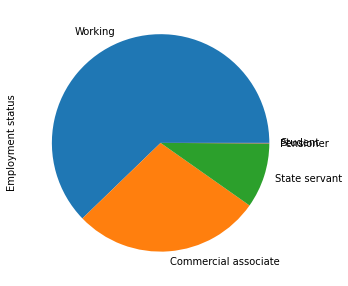

In [39]:
print(train_data['Employment status'].value_counts())
train_data['Employment status'].value_counts().plot(kind='pie' ,figsize=(5,5))
plt.show()

#### more than 90% applicants dont have email

0    18097
1     2041
Name: Has an email, dtype: int64


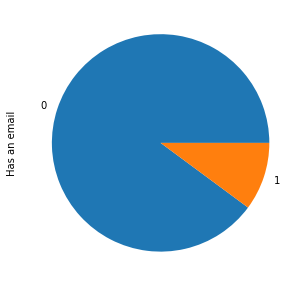

In [40]:
print(train_data['Has an email'].value_counts())
train_data['Has an email'].value_counts().plot(kind='pie' ,figsize=(5,5))
plt.show()

#### More than ¾ of applicants don’t have a work phone

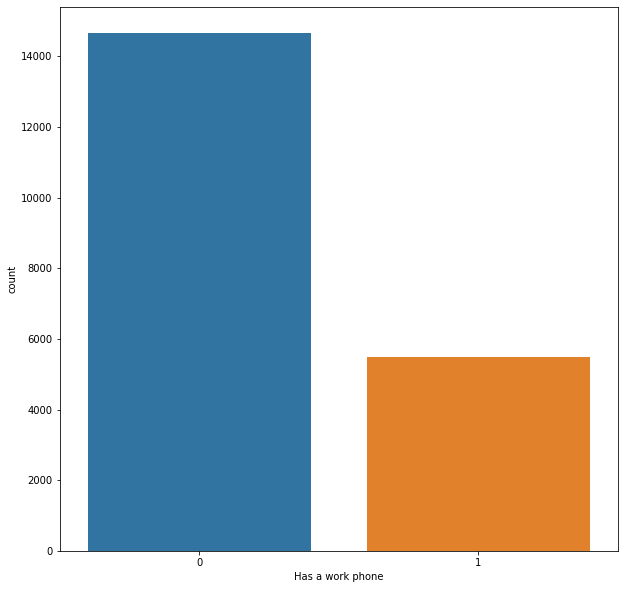

In [41]:
plt.figure(figsize=[10,10])
sns.countplot(train_data['Has a work phone'])
plt.show()

## Business findings from the EDA

### Typical profile of an applicant is: a Female  married with a partner and no child. She has been employed for many years with a #salary good. She has completed her secondary education. She does not own a car but owns a property (a house/ apartment). Her account is very old.
### and income account age,age most important fetures
### Those who are flagged as bad client, tend to have a shorter employment length and older accounts. They also constitute less  applicants.
### Most applicants are 20 to 45 years old and have a good account balance account that  .

## Data preprocessing

## Label Encoding

### converting the labels into a numeric

In [42]:
from sklearn.preprocessing import LabelEncoder

col=["Has a car","Has a property","Gender"]

lable = LabelEncoder()

train_data[col] = train_data[col].apply(lable.fit_transform)

#### pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables

In [43]:
train_data= pd.get_dummies(train_data,drop_first=True)
train_data.head()

,Gender,Has a car,Has a property,Children count,Income,Age,Employment length,Has a work phone,Has a phone,Has an email,...,Job title_Laborers,Job title_Low-skill Laborers,Job title_Managers,Job title_Medicine staff,Job title_Private service staff,Job title_Realty agents,Job title_Sales staff,Job title_Secretaries,Job title_Security staff,Job title_Waiters/barmen staff
0,1,1,1,0,135000.0,-16271,-3111,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,135000.0,-10130,-1651,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2,180000.0,-12821,-5657,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,1,0,360000.0,-20929,-2046,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,0,1,1,0,135000.0,-13251,-3839,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
train_data2=train_data.copy(deep=True)

In [45]:
X = train_data2.drop('Is high risk',axis = 1)
Y = train_data2['Is high risk']

## SMOTE


## SMOTE (synthetic minority oversampling technique)
## used oversampling methods to solve the imbalance problem

In [46]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 1)
X1,Y1 = smote.fit_resample(X,Y)
Y1.value_counts()

0    19794
1    19794
Name: Is high risk, dtype: int64

## train and testing the data with test_size of 20%

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2,random_state=1)
print("Shape of is X_train :",X_train.shape)
print("Shape of is X_test :",X_test.shape)
print("Shape of is y_train :",y_train.shape)
print("Shape of is y_test :",y_test.shape)

Shape of is X_train : (31670, 46)
Shape of is X_test : (7918, 46)
Shape of is y_train : (31670,)
Shape of is y_test : (7918,)


## Libraries

In [48]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

## feature_importances

In [49]:
model=RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

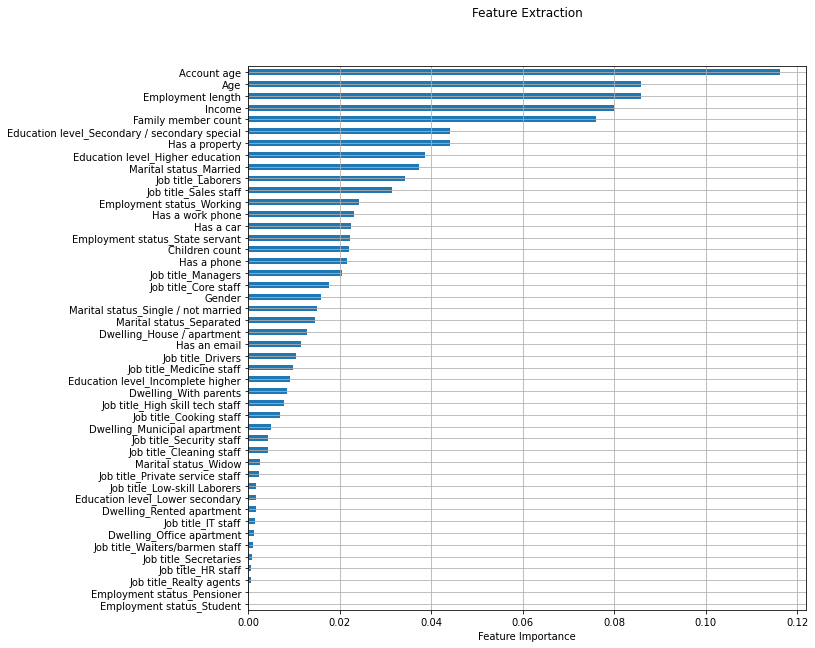

In [50]:
fig = plt.figure(figsize=(10,10))
feature_imps = pd.Series(model.feature_importances_, index = X_train.columns)
feature_imps.sort_values(ascending=True).plot(kind='barh')
plt.grid(True)
plt.title("Feature Extraction", pad=50)
plt.xlabel('Feature Importance')
plt.show()

 ## StandardScaler


 ### standard scaler transforms the skewed data into a normal distribution it will bring mean to 0 and standard deviation to 1

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X)
X = scaler.fit_transform(X)

## Model bulding

In [52]:
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression(random_state=1)
Logistic_model.fit(X_train, y_train)

LogisticRegression(n_jobs=5, random_state=1)

## Making predictions and evaluating performance

In [53]:
y_pred_prod = Logistic_model.predict(X_test)
print(pd.DataFrame({'Actual':y_test,'Predicted':y_pred_prod}).head(10))


       Actual  Predicted
38510       1          0
14586       0          0
19316       0          1
29137       1          0
24091       1          1
26870       1          1
17575       0          0
14698       0          0
29922       1          1
11251       0          0


## classification_report

In [54]:
print(classification_report(y_test,y_pred_prod))

              precision    recall  f1-score   support

           0       0.58      0.49      0.53      3959
           1       0.56      0.65      0.60      3959

    accuracy                           0.57      7918
   macro avg       0.57      0.57      0.57      7918
weighted avg       0.57      0.57      0.57      7918



## confusion_matrix

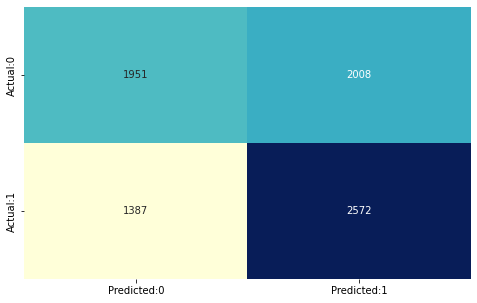

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_prod) 
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

## Roc_curve

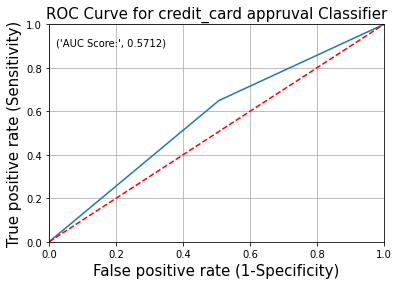

In [56]:
def plot_roc(model):
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prod)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for credit_card appruval Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,y_pred_prod),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(Logistic_model)

## model evaluation

In [57]:
from sklearn import metrics

cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score','Kappa Score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
model = pd.Series({'Model': "Logistic_regression",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prod),
                 'Precision Score': metrics.precision_score(y_test, y_pred_prod),
                 'Recall Score': metrics.recall_score(y_test, y_pred_prod),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_prod),
                  'f1-score':metrics.f1_score(y_test, y_pred_prod),
                    'Kappa Score':cohen_kappa_score(y_test,y_pred_prod)})



# appending our result table
result_tabulation = result_tabulation.append(model , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score,Kappa Score
0,Logistic_regression,0.57123,0.561572,0.649659,0.57123,0.602412,0.14246


## XGBClassifier

In [58]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
list1=[]
testAcc=[]
trainAcc=[]
for i in range(1, 16):
    XGB_Classifier=XGBClassifier(max_depth = i,n_estimators=100)
    XGB_Classifier.fit(X_train,y_train)

    trainPred = XGB_Classifier.predict(X_train)
    trainAcc.append(accuracy_score(trainPred, y_train))
    

    testPred = XGB_Classifier.predict(X_test)
    testAcc.append(accuracy_score(testPred, y_test))
    
    list1.append([i,metrics.accuracy_score(trainPred, y_train),metrics.accuracy_score(testPred,  y_test)])


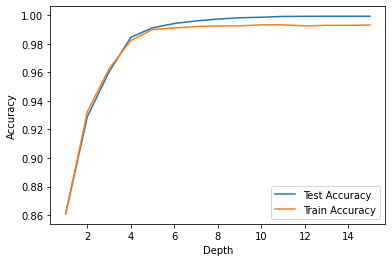

In [59]:
from pandas import DataFrame
df2 = DataFrame (list1,columns=['Depth','Test Accuracy','Train Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
print(pd.DataFrame({'Actual':y_test,'Predicted':testPred}).head(10))

       Actual  Predicted
38510       1          1
14586       0          0
19316       0          0
29137       1          1
24091       1          1
26870       1          1
17575       0          0
14698       0          0
29922       1          1
11251       0          0


## Cross-validation

In [61]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

XGB_=XGBClassifier(n_estimators=100)
stratifiedkf=StratifiedKFold(n_splits=10)
score=cross_val_score(XGB_,X_train,y_train,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score))

Cross Validation Scores are [0.98926429 0.99242185 0.99210609 0.99210609 0.99115883 0.99021156
 0.99115883 0.99147458 0.99147458 0.99084307]


## classification_report

In [62]:
print(classification_report(y_test,testPred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3959
           1       1.00      0.99      0.99      3959

    accuracy                           0.99      7918
   macro avg       0.99      0.99      0.99      7918
weighted avg       0.99      0.99      0.99      7918



## confusion_matrix

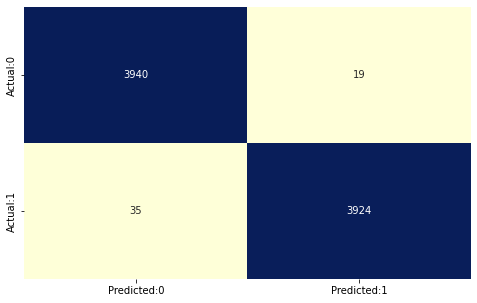

In [63]:

cm = confusion_matrix(y_test, testPred) 
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

## Roc_curve

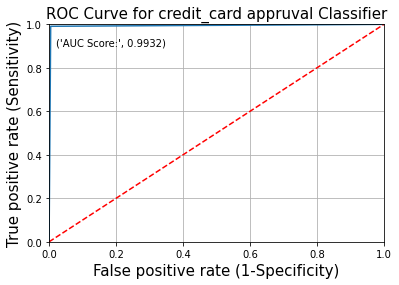

In [64]:
def plot_roc(model):
    
    fpr, tpr, thresholds = roc_curve(y_test, testPred)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for credit_card appruval Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,testPred),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(XGB_Classifier)

In [65]:
from sklearn import metrics

# compiling the required information
XGB = pd.Series({'Model': "XGBClassifier",
                'AUC Score' : metrics.roc_auc_score(y_test, testPred),
                 'Precision Score': metrics.precision_score(y_test, testPred),
                 'Recall Score': metrics.recall_score(y_test, testPred),
                 'Accuracy Score': metrics.accuracy_score(y_test,testPred),
                  'f1-score':metrics.f1_score(y_test, testPred),
                    'Kappa Score':cohen_kappa_score(y_test,testPred)})



# appending our result table
result_tabulation = result_tabulation.append( XGB , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score,Kappa Score
0,Logistic_regression,0.57123,0.561572,0.649659,0.57123,0.602412,0.14246
1,XGBClassifier,0.99318,0.995181,0.991159,0.99318,0.993166,0.98636


##  Grid Search CV using RandomForest

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = RandomForestClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [67]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)

In [68]:
from sklearn.ensemble import RandomForestClassifier
Random_forest=RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt', max_leaf_nodes=25,
                       min_samples_leaf=30, random_state=1024)

Random_forest.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_leaf_nodes=25, min_samples_leaf=30,
                       random_state=1024)

## Making predictions and evaluating performance

In [69]:
RandomForest_predict=Random_forest.predict(X_test)
print(pd.DataFrame({'Actual':y_test,'Predicted':RandomForest_predict}).head(10))

       Actual  Predicted
38510       1          0
14586       0          1
19316       0          0
29137       1          0
24091       1          1
26870       1          1
17575       0          0
14698       0          0
29922       1          1
11251       0          0


## classification_report

In [70]:
print(classification_report(y_test,RandomForest_predict))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3959
           1       0.92      0.83      0.87      3959

    accuracy                           0.88      7918
   macro avg       0.88      0.88      0.88      7918
weighted avg       0.88      0.88      0.88      7918



## confusion_matrix

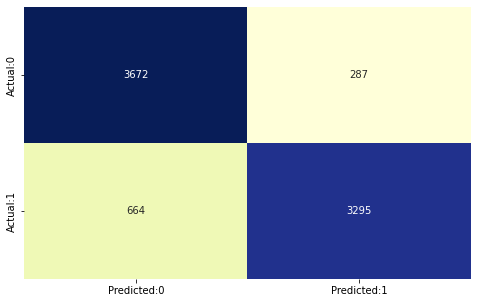

In [71]:
cm = confusion_matrix(y_test, RandomForest_predict) 
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

## Roc Curve

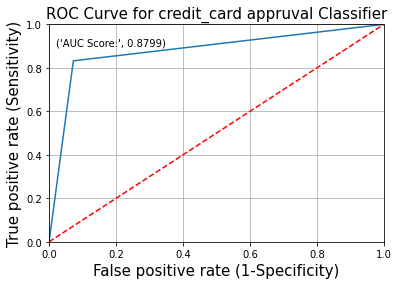

In [72]:
def plot_roc(model):
    
    fpr, tpr, thresholds = roc_curve(y_test, RandomForest_predict)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for credit_card appruval Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,RandomForest_predict),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(Random_forest)

## Model evaluation

In [73]:


# compiling the required information
Random_forest = pd.Series({'Model': "Random_forest",
                     'AUC Score' : metrics.roc_auc_score(y_test, RandomForest_predict),
                 'Precision Score': metrics.precision_score(y_test, RandomForest_predict),
                 'Recall Score': metrics.recall_score(y_test, RandomForest_predict),
                 'Accuracy Score': metrics.accuracy_score(y_test, RandomForest_predict),
                  'f1-score':metrics.f1_score(y_test, RandomForest_predict),
                'Kappa Score':cohen_kappa_score(y_test,RandomForest_predict)})



# appending our result table
result_tabulation= result_tabulation.append( Random_forest , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score,Kappa Score
0,Logistic_regression,0.571230,0.561572,0.649659,0.571230,0.602412,0.142460
1,XGBClassifier,0.993180,0.995181,0.991159,0.993180,0.993166,0.986360
2,Random_forest,0.879894,0.919877,0.832281,0.879894,0.873889,0.759788


## Support vector classcifier

#### Note: there four types of kernels : linear,rbf,poly and sigmoid the most reliable and to get best accuracy we use linear kernel

In [74]:
from sklearn.svm import SVC
svc_model=SVC(C=0.01, kernel='rbf')
svc_model.fit(X_train,y_train)

SVC(C=0.01)

## Making predictions and evaluating performance

In [75]:
svc_predict=svc_model.predict(X_test)
print(pd.DataFrame({'Actual':y_test,'Predicted':svc_predict}).head(10))


       Actual  Predicted
38510       1          1
14586       0          0
19316       0          1
29137       1          1
24091       1          1
26870       1          1
17575       0          0
14698       0          0
29922       1          0
11251       0          0


## classification_report

In [76]:
print(classification_report(y_test,svc_predict))

              precision    recall  f1-score   support

           0       0.53      0.58      0.55      3959
           1       0.53      0.48      0.50      3959

    accuracy                           0.53      7918
   macro avg       0.53      0.53      0.53      7918
weighted avg       0.53      0.53      0.53      7918



## confusion_matrix

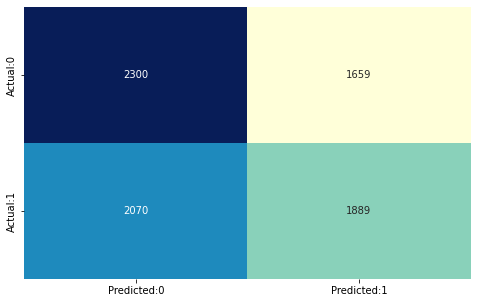

In [77]:
cm = confusion_matrix(y_test, svc_predict) 
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

## ROC Curve

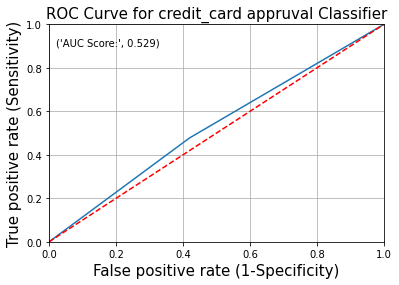

In [78]:
def plot_roc(model):
    
    fpr, tpr, thresholds = roc_curve(y_test, svc_predict)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for credit_card appruval Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,svc_predict),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(svc_model)

## Model evaluation

In [79]:


# compiling the required information
svc_model = pd.Series({'Model': "svc_model",
                     'AUC Score' : metrics.roc_auc_score(y_test, svc_predict),
                 'Precision Score': metrics.precision_score(y_test, svc_predict),
                 'Recall Score': metrics.recall_score(y_test, svc_predict),
                 'Accuracy Score': metrics.accuracy_score(y_test, svc_predict),
                  'f1-score':metrics.f1_score(y_test, svc_predict),
                'Kappa Score':cohen_kappa_score(y_test,svc_predict)})

   

# appending our result table
result_tabulation= result_tabulation.append( svc_model , ignore_index = True)
#s2=pd.concat(result_tabulation)
# view the result table
result_tabulation
#s2

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score,Kappa Score
0,Logistic_regression,0.571230,0.561572,0.649659,0.571230,0.602412,0.142460
1,XGBClassifier,0.993180,0.995181,0.991159,0.993180,0.993166,0.986360
2,Random_forest,0.879894,0.919877,0.832281,0.879894,0.873889,0.759788
3,svc_model,0.529048,0.532413,0.477141,0.529048,0.503264,0.058095


## Ada Boost

In [80]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost=AdaBoostClassifier().fit(X_train,y_train)

## Making predictions and evaluating performance

In [81]:
boost_predict=ada_boost.predict(X_test)
print(pd.DataFrame({'Actual':y_test,'Predicted':boost_predict}).head(10))

       Actual  Predicted
38510       1          0
14586       0          0
19316       0          1
29137       1          0
24091       1          1
26870       1          1
17575       0          0
14698       0          0
29922       1          1
11251       0          0


## classification_report

In [82]:
print(classification_report(y_test,boost_predict))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3959
           1       0.87      0.86      0.86      3959

    accuracy                           0.86      7918
   macro avg       0.86      0.86      0.86      7918
weighted avg       0.86      0.86      0.86      7918



## confusion_matrix

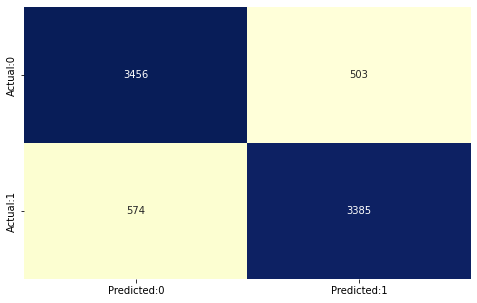

In [83]:
cm = confusion_matrix(y_test,boost_predict) 
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

## Roc_curve

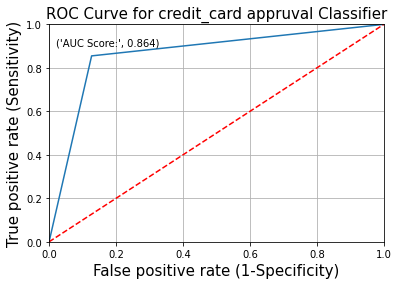

In [84]:
def plot_roc(model):
    
    fpr, tpr, thresholds = roc_curve(y_test, boost_predict)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for credit_card appruval Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,boost_predict),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(boost_predict)

## Model evaluation

In [85]:


# compiling the required information
boost_model = pd.Series({'Model': "Ada_Boost",
                     'AUC Score' : metrics.roc_auc_score(y_test, boost_predict),
                 'Precision Score': metrics.precision_score(y_test, boost_predict),
                 'Recall Score': metrics.recall_score(y_test, boost_predict),
                 'Accuracy Score': metrics.accuracy_score(y_test, boost_predict),
                  'f1-score':metrics.f1_score(y_test, boost_predict),
                'Kappa Score':cohen_kappa_score(y_test,boost_predict)})



# appending our result table
result_tabulation= result_tabulation.append( boost_model , ignore_index = True)

result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score,Kappa Score
0,Logistic_regression,0.571230,0.561572,0.649659,0.571230,0.602412,0.142460
1,XGBClassifier,0.993180,0.995181,0.991159,0.993180,0.993166,0.986360
2,Random_forest,0.879894,0.919877,0.832281,0.879894,0.873889,0.759788
3,svc_model,0.529048,0.532413,0.477141,0.529048,0.503264,0.058095
4,Ada_Boost,0.863981,0.870628,0.855014,0.863981,0.862750,0.727962


## Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
Decision_model=DecisionTreeClassifier()
Decision_model.fit(X_train,y_train)

DecisionTreeClassifier()

## Making predictions and evaluating performance

In [87]:
decision_predict=Decision_model.predict(X_test)
print(pd.DataFrame({'Actual':y_test,'Predicted':decision_predict}).head(10))


       Actual  Predicted
38510       1          1
14586       0          0
19316       0          0
29137       1          1
24091       1          1
26870       1          1
17575       0          0
14698       0          0
29922       1          1
11251       0          0


## classification_report

In [88]:
print(classification_report(y_test,decision_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3959
           1       0.98      0.98      0.98      3959

    accuracy                           0.98      7918
   macro avg       0.98      0.98      0.98      7918
weighted avg       0.98      0.98      0.98      7918



## confusion_matrix

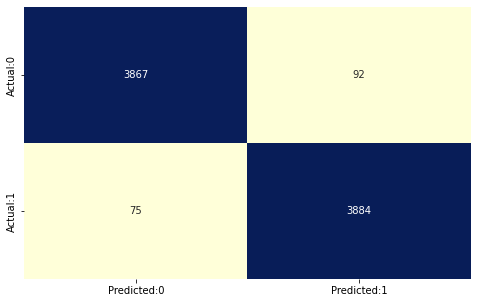

In [89]:
cm = confusion_matrix(y_test,decision_predict) 
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

## Roc_curve

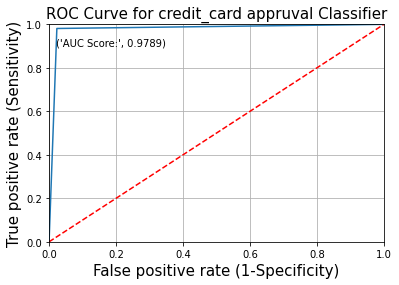

In [90]:
def plot_roc(model):
    
    fpr, tpr, thresholds = roc_curve(y_test, decision_predict)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC Curve for credit_card appruval Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,decision_predict),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(decision_predict)

## Model evaluation

In [91]:

   
Decision_model = pd.Series({'Model': "Decision tree",
                     'AUC Score' : metrics.roc_auc_score(y_test, decision_predict),
                 'Precision Score': metrics.precision_score(y_test, decision_predict),
                 'Recall Score': metrics.recall_score(y_test, decision_predict),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_predict),
                  'f1-score':metrics.f1_score(y_test, decision_predict),
                'Kappa Score':cohen_kappa_score(y_test,decision_predict)})



result_tabulation= result_tabulation.append( Decision_model , ignore_index = True)

result_tabulation


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score,Kappa Score
0,Logistic_regression,0.571230,0.561572,0.649659,0.571230,0.602412,0.142460
1,XGBClassifier,0.993180,0.995181,0.991159,0.993180,0.993166,0.986360
2,Random_forest,0.879894,0.919877,0.832281,0.879894,0.873889,0.759788
3,svc_model,0.529048,0.532413,0.477141,0.529048,0.503264,0.058095
4,Ada_Boost,0.863981,0.870628,0.855014,0.863981,0.862750,0.727962
5,Decision tree,0.978909,0.976861,0.981056,0.978909,0.978954,0.957818


### Top model
### XG boosting classifier with cross validation 


### Using the ROC curve and recall, we can that conclude that our top model is



### Since the objective of this problem is to minimize the risk of credit default for the financial institution, the metrics to use depends on the current economical situation:

### Note: There is always a trade-off between precision and recall. Choosing the right metrics depends on the problem you are solving.

###  Conclusion: In our case, since we are in the longest bull market we will use recall as our metric.

## Test_data

In [108]:
test_data=pd.read_csv("test.csv")
test_data.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [109]:
test_data.shape

(7292, 20)

In [110]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [111]:
test_data=test_data.drop(["Has a mobile phone"],axis=1)


In [112]:
nan_value = float("NaN")

test_data.replace("", nan_value, inplace=True)

test_data.dropna(subset = ["Job title"], inplace=True)

In [113]:
test_data.isnull().sum()

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

In [114]:
ID=test_data["ID"]

In [115]:
test_data=test_data.drop(["ID"],axis=1)

In [116]:
from sklearn.preprocessing import LabelEncoder
col=["Has a car","Has a property","Gender"]
lable = LabelEncoder()
test_data[col] = test_data[col].apply(lable.fit_transform)

In [117]:
test_data= pd.get_dummies(test_data,drop_first=True)
test_data.head()

,Gender,Has a car,Has a property,Children count,Income,Age,Employment length,Has a work phone,Has a phone,Has an email,...,Job title_Laborers,Job title_Low-skill Laborers,Job title_Managers,Job title_Medicine staff,Job title_Private service staff,Job title_Realty agents,Job title_Sales staff,Job title_Secretaries,Job title_Security staff,Job title_Waiters/barmen staff
0,0,0,1,0,202500.0,-16834,-1692,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,675000.0,-18126,-948,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,234000.0,-21967,-5215,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,445500.0,-12477,-456,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,225000.0,-12155,-667,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [118]:
test_data.shape

(4996, 47)

In [119]:
test_data=test_data.drop('Employment status_Student',axis=1)

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(test_data)
test_data = scaler.fit_transform(test_data)


In [121]:
predict=XGB_Classifier.predict(test_data)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
# create dataframe for predicted values
df = pd.DataFrame(predict)
df.rename({0:"credit card appruval"},inplace =True,axis=1)

In [123]:
## concating the predicted values with id
dataframe  = pd.DataFrame()
dataframe = pd.concat([ID.reset_index(drop=True),df.reset_index(drop=True)],axis=1)
dataframe

,ID,credit card appruval
0,5091261,0
1,5096963,0
2,5087880,0
3,5021949,0
4,5105705,0
...,...,...
4991,5105673,0
4992,5065795,0
4993,5088665,0
4994,5068826,0


In [125]:
## save the values in csv file formate
dataframe.to_csv("credit_card_appruval.csv",index=False)

# **Thank you a lot for your interest** ☻